# Compute the hitting times for democracies analytically
To contrast the Kaplan--Meier survival curves that we obtained from simulated Markvoc chains, we compute analytical expressions of the mean hitting times (i.e., the time until a full democracy ceases to be a democracy). Similarly, we can fnd the mean time until a full autocracy becomes for the first time a democracy.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import copy
#from scipy.optimize import minimize

from scipy.optimize import lsq_linear


sns.set_context("talk", font_scale=1.4)

In [5]:
# load the transition matrix
P_allCountries_Bayes = np.genfromtxt('./../results/transitionBayesAllCountries.csv')

In [6]:
def computeAnalyticalHittingTime(transitionMatrix,hittingSet=[-10]):
    n=transitionMatrix.shape[0]

    # set up vector
    b=[]
    for i in np.arange(-10,11):
        if i in hittingSet:
            b.append(0)
        else:
            b.append(-1)
    b=np.array(b)

    # set up the matrix
    hittingTimeMatrix = copy.copy(transitionMatrix)# We start with the transition matrix
    for i in np.arange(-10,11):
        index=i+10
        if i in hittingSet:
            hittingTimeMatrix[:,index] = 0
            hittingTimeMatrix[index,index] = 1
        else:
            hittingTimeMatrix[index,index] = hittingTimeMatrix[index,index] - 1
    
     ## solve the equation
    # We use an iterative procedure to ensure that the hitting times that are by definition zero are actualy zero.
    A = hittingTimeMatrix

    x = np.linalg.solve(A,b)
    pos = np.where(x>=0.)[0]

    while len(pos) < n:
        Ap = A[pos][:,pos]
        bp = b[pos]
        xp = np.linalg.solve(Ap, bp)
        x = np.zeros(len(b))
        x[pos] = xp
        pos = np.where(x>=0.)[0]

    hittingTimes = x

    return(hittingTimes)








In [10]:
hittingTimesAutocracy = computeAnalyticalHittingTime(P_allCountries_Bayes,hittingSet=np.arange(-10,0))
hittingTimesDemocracy = computeAnalyticalHittingTime(P_allCountries_Bayes,hittingSet=np.arange(0,11))

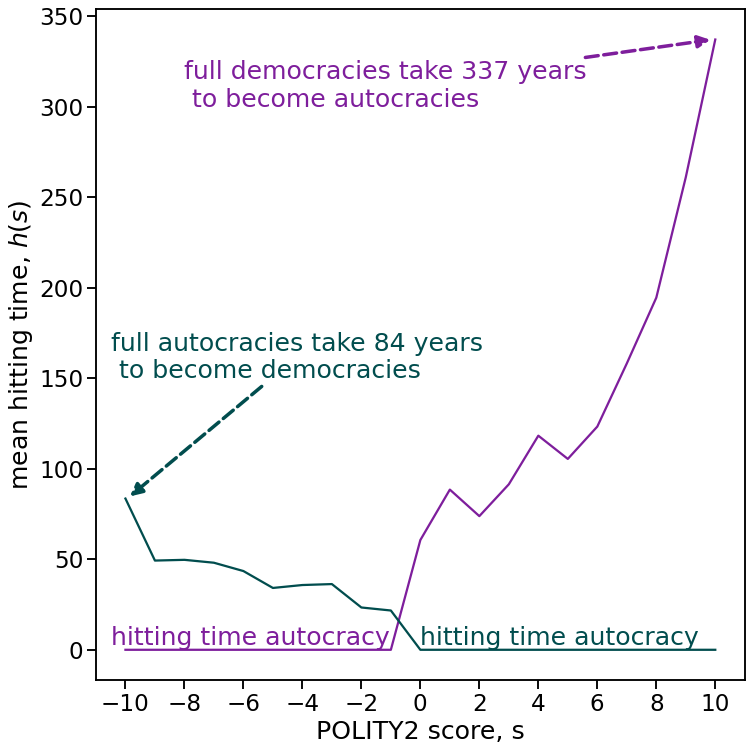

In [60]:
x=np.arange(-10,11)

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x,hittingTimesAutocracy,color=sns.xkcd_rgb['purple'])
plt.plot(x,hittingTimesDemocracy,color=sns.xkcd_rgb['dark teal'])


plt.ylabel('mean hitting time, $h(s)$')
plt.xlabel('POLITY2 score, s')
plt.xticks(np.arange(-10,11,2))


plt.text(0,3,'hitting time autocracy',color=sns.xkcd_rgb['dark teal'])
plt.text(-10.5,3,'hitting time autocracy',color=sns.xkcd_rgb['purple'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped


ax.annotate('full democracies take 337 years\n to become autocracies', xy=(9.9, 337),
             xycoords='data',
             xytext=(-8, 300),
             textcoords='data',
             color=sns.xkcd_rgb['purple'],
             arrowprops=dict(arrowstyle= '-|>',
                             color=sns.xkcd_rgb['purple'],
                             lw=3.5,
                             ls='--')
           )


ax.annotate('full autocracies take 84 years\n to become democracies', xy=(-9.9, 84),
             xycoords='data',
             xytext=(-10.5, 150),
             textcoords='data',
             color=sns.xkcd_rgb['dark teal'],
             arrowprops=dict(arrowstyle= '-|>',
                             color=sns.xkcd_rgb['dark teal'],
                             lw=3.5,
                             ls='--')
           )

plt.savefig('./../results/supplementaryFigures/FigS3-analyticalHittingTimes.pdf')

The mean time until a Full Democracy becomes an Autocracy is

In [15]:
hittingTimesAutocracy[-1]

337.0092233293917

The mean time until a Full Autocracy becomes an Democracy is

In [16]:
hittingTimesDemocracy[0]

83.51220707284644

We also can easily compute more specific hitting times, for exmaple, the average time until a Full Democracy becomes a Full Autocracy

In [22]:
hittingTimeFullAutocracy = computeAnalyticalHittingTime(P_allCountries_Bayes,hittingSet=[-10])
print(hittingTimeFullAutocracy)

[   0.         1727.29028903 1634.50472565 1747.04928444 1779.94713624
 1814.98263995 1799.8819421  1816.20463818 1841.18116778 1842.98217224
 1814.04150938 1853.38844671 1802.93288725 1854.54399322 1853.98159535
 1868.97746482 1885.09592742 1914.43668306 1954.85181713 2019.91167252
 2090.59461573]


In [23]:
hittingTimeFullDemocracy = computeAnalyticalHittingTime(P_allCountries_Bayes,hittingSet=[+10])
print(hittingTimeFullDemocracy)

[318.1448231  280.45064009 284.09596001 283.75925238 278.40411193
 269.48487637 273.5857351  274.97798406 251.68786456 258.1959775
 258.6312268  252.03434942 257.71765388 249.35225503 236.45504163
 239.48289214 231.31758911 206.18689702 170.96385892 112.94242759
   0.        ]
